# Prelab 4: How to use Scikit Learn for Regression

**scikit-learn** is a popular machine learning package that contains a variety of models and tools. In this lab and lab 4 we will work with different models provided by **scikit-learn** package and build several models.

All objects within scikit-learn share a uniform common basic API consisting of 3 interfaces: an _estimator_ interface for building and fitting models, a _predictor_ interface for making predictions, and a _transformer_ interface for converting data.

>The _estimator_  interface defines object mechanism and a fit method for learning a model from training data. All supervised and unsupervised learning algorithms are offered as objects implementing this interface. Other machine learning tasks such as _feature extraction_, _feature selection_, and _dimensionality reduction_ are provided as _estimators_. 

For more information, check the scikit-learn API paper: [https://arxiv.org/pdf/1309.0238v1.pdf]

The general form of using models in scikit-learn:


```
clf = someModel( )
clf.fit(x_train , y_tain)
```

For Example: 

```
clf = LinearSVC( )
clf.fit(x_train , y_tain)
```

>The _predictor_ adds a predict method that takes an array x_test and produces predictions for x_test, based on the learned parameters of the _estimator_. In supervised learning, this method typically return predicted labels or values computed by the model. Some unsupervised learning estimators may also implement the predict interface, such as __k-means__, where the predicted values are the cluster labels.

```
clf.predict(x_test)
```

>_transform_ method is used to modify or filter data before feeding it to a learning algorithm. It takes some new data as input and outputs a transformed version of that data. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as _transformers_ within the library. 

This is usually done with __fit_transform__ method. For example: 

```
PCA = RandomizedPCA (n_components = 2) 
x_train = PCA.fit_transform(x_train)
x_test = PCA.fit_transform(x_test)

```

In the example above, we first __fit__ the training set to find the PC components, then they are transformed. 

We can summarize the _estimator_ as follows:

* In _all estimators_
    - `model.fit()` : fit training data. In supervised learning, fit will take two parameters: the data x and labels y. In unsupervised learning, fit will take a single parameter: the data x

* In _supervised estimators_
    - `model.predict()` : predict the label of new test data for the given model. Predict takes one parameter: the new test data and returns the learned label for each item in the test data 
    - `model.score()` : Returns the score method for classification or regression methods.

* In _unsupervised estimators_

    - `model.transform()`: Tranform new data into new basis. Transform takes one parameter: new data and returns a new representation of that data based on the model
  
    


### Linear Regression

Let's start with a simple linear regression. First we will see an example of a simple linear regression. A simple straight line that fits the data. The formula representing the model is $$y = \beta_1 x +  \beta_0$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Let's start by using the following simple data for showing how linear regression works in scikit-learn. Then it will be your turn to build a regression model on a dataset

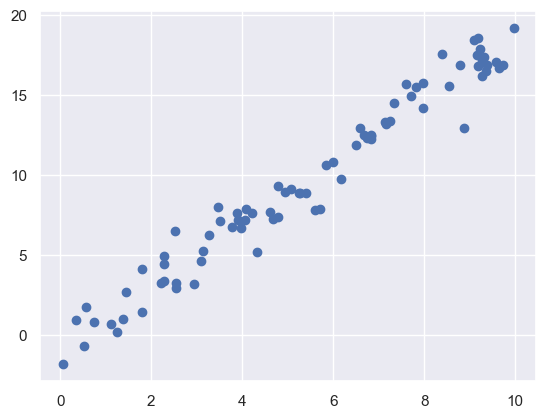

In [2]:
rng = np.random.RandomState(50)

x = 10 * rng.rand(80)
y = 2 * x - 1 + rng.randn(80)

plt.scatter(x,y)

After processing your data, the first step is to choose a model. For the dataset above, we are going to pick "Linear Regression" model. Simply import your model:

In [3]:
from sklearn.linear_model import LinearRegression

Next, pick the model hyperparameters

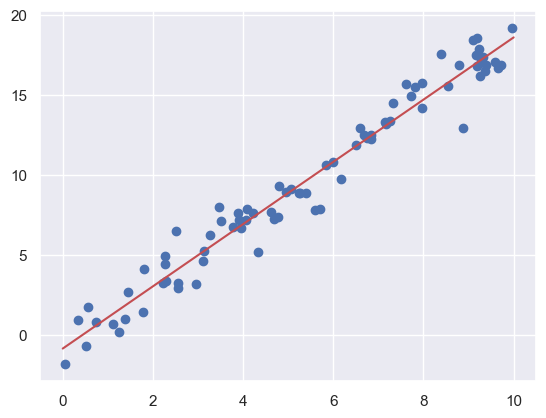

In [4]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000) 
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r');

We can check the model settings: 

In [5]:
print(model.coef_[0])
print(model.intercept_)

1.944535887214308
-0.8492545699739527


### Linear regression on scikit-learn datasets

You can use datasets provided by scikit-learn as well. In the example below, we will apply linear regression to the **diabetes** dataset. (source [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py) )

In the diabetes datasets, ten baseline variables; age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

**How to evaluate a regression model?**

When it comes to regression model we have a variety of metrics that we can use to evaluate our model. The most common ones are:



*   Mean Squared Error (MSE): the mean of squared errors:

  *  $\frac{1}{n} \Sigma (y_i - \hat{y}_i)^2$

*   Mean Absolute Error (MAE): the mean of the absolute value of the errors:

  *  $\frac{1}{n} \Sigma |y_i - \hat{y}_i|$
    
* Root Mean Squared Error (RMSE): the square root of the mean of the squared errors:
    * $\sqrt{\frac{1}{n} \Sigma (y_i - \hat{y}_i)^2}$




You can check the full list of regression metrics here [Scikit-Learn: Regression Metrics](https://scikit-learn.org/stable/modules/classes.html#regression-metrics)


Coefficients: 
 [929.57818952]
mean squared error: 3820.38
R-squared: 0.40


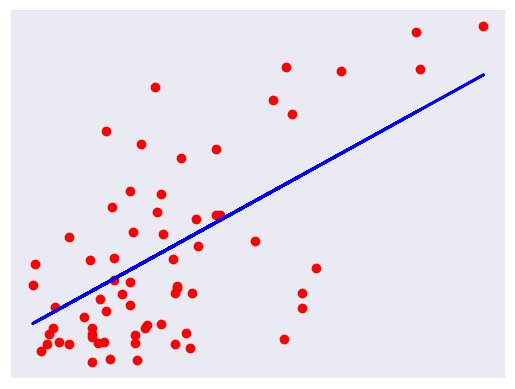

In [6]:
# Importing diabetes dataset
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Load the diabetes dataset
diabetes = load_diabetes()

# Use only one feature -- the following code creates a 1-dimensional 
# array containing just the second feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_data = diabetes_X[:,:,2]

# Split the data into training/testing sets
diabetes_X_train,diabetes_X_test , diabetes_y_train, diabetes_y_test = train_test_split(
                                     diabetes_X_data, diabetes.target, test_size = 0.15)

m1 = LinearRegression()

# Train the model with training data 
m1.fit(diabetes_X_train, diabetes_y_train)

# Make predictions on test data 
diabetes_y_pred = m1.predict(diabetes_X_test)

# print the coefficient 
print('Coefficients: \n', m1.coef_)

# print the mean squared error
print('mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred))

# print the r-squared
print('R-squared: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot 
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()


In the previous example we used one feature only (the second feature) because we consider that *bmi* is an important factor for diabetes; however, we can systematically search for important features using feature selection methods.

In [7]:
diabetes.feature_names[2]

'bmi'




**Feature selection** allows your estimator to perform a better job by decreasing the model complexity and overfitting.
scikit-learn provides several feature selection methods such as `SelectKBest` and `RFE`. 

Here is an example of using `RFE` or [Recursive Feature Elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) on diabetes dataset:

In [12]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator = m2, n_features_to_select = 2 , step = 1)
rfe.fit(diabetes_X_train, diabetes_y_train)
print(rfe.support_)
print(rfe.ranking_)
f = rfe.get_support(True) #the most important features
print(f)

NameError: name 'm2' is not defined

The `RFE` is a popular feature selection algorithm. It is a feature ranking with recursive feature elimination.
```
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is reached.
```

`n_features_to_select` or number of features to select is an important hyperparameter for `RFE` algorithm. In the previous example, we set this parameter to 2 and the ranking shows the top two features that were selected.
